In [28]:

import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np




In [54]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [91]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [2]:

## !pip install torchvision


In [3]:

torch.cuda.is_available()


True

In [4]:

torch.cuda.device_count()


1

In [5]:

torch.cuda.current_device()


0

In [6]:

torch.cuda.get_device_name(0)


'NVIDIA A30'


## CIFAR10 DATA


In [7]:

raw_data_train = '/home/rcalix/Desktop/CIFAR-10-images-master/train/'

raw_data_test  = '/home/rcalix/Desktop/CIFAR-10-images-master/test/'



## Train data


In [8]:

dataset_train = []
labels_train  = []
targets_train = []


In [9]:

for folder in os.listdir( raw_data_train ):
    ## print(folder)
    for image in os.listdir( os.path.join(raw_data_train, folder) ):
        if folder not in labels_train:
            labels_train.append( folder )
        targets_train.append(  labels_train.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_train, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_train.append(img)
        
      


In [10]:

len(labels_train)


10

In [11]:

len( targets_train )


50000

In [12]:

dataset_train[3].shape


torch.Size([3, 32, 32])

In [13]:

data_train    = torch.stack( dataset_train )
targets_train = torch.Tensor(  targets_train  ).type(   torch.LongTensor   )

torch.save(   (data_train, targets_train, labels_train), "InClass_CIFAR10_data"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [15]:

data_train.shape


torch.Size([50000, 3, 32, 32])

In [16]:

targets_train.shape


torch.Size([50000])

In [17]:

data_train[4].shape


torch.Size([3, 32, 32])

In [18]:

targets_train[24000:25000]


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,


## Print images


In [19]:

img_tr = data_train[46000]
img_tr


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0196, 0.0157],
         [0.0000, 0.0039, 0.0078,  ..., 0.0196, 0.0039, 0.0039],
         [0.0157, 0.0039, 0.0000,  ..., 0.0078, 0.0039, 0.0196],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0275, 0.0314, 0.0314],
         [0.0353, 0.0275, 0.0000,  ..., 0.0118, 0.0157, 0.0157],
         [0.0000, 0.0235, 0.0000,  ..., 0.0157, 0.0235, 0.0275]],

        [[0.0078, 0.0078, 0.0118,  ..., 0.0000, 0.0039, 0.0000],
         [0.0118, 0.0157, 0.0157,  ..., 0.0118, 0.0000, 0.0000],
         [0.0157, 0.0039, 0.0000,  ..., 0.0078, 0.0039, 0.0196],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0118, 0.0157],
         [0.0353, 0.0275, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0235, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0000],
         [0.0078, 0.0000, 0.0000,  ..., 0.0078, 0.0039, 0.

In [20]:

transform = T.ToPILImage()



In [21]:

img = transform(  img_tr  )


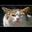

In [22]:

img



## Class balance


In [29]:

y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

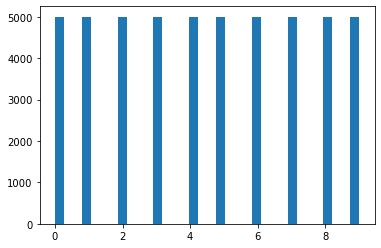

In [30]:

_ = plt.hist( targets_train.numpy() , bins="auto" )
plt.show()



## Test Data


In [32]:

dataset_test = []
labels_test = []
targets_test = []


In [33]:

for folder in os.listdir( raw_data_test ):
    ## print(folder)
    for image in os.listdir( os.path.join(raw_data_test, folder) ):
        if folder not in labels_test:
            labels_test.append( folder )
        targets_test.append(  labels_test.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_test.append(img)


In [34]:

data_test   = torch.stack( dataset_test )
targets_test = torch.Tensor(  targets_test  ).type(   torch.LongTensor   )

torch.save(   (data_test, targets_test, labels_test), "InClass_CIFAR10_data_test"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [35]:

data_test.shape


torch.Size([10000, 3, 32, 32])

In [36]:

targets_test.shape


torch.Size([10000])

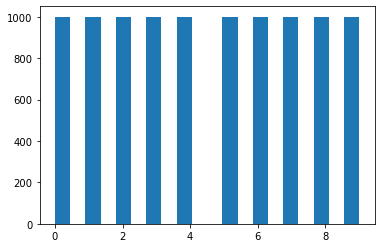

In [37]:

_ = plt.hist( targets_test.numpy() , bins="auto" )
plt.show()


In [38]:

X_train = data_train  
y_train = targets_train


In [39]:

X_test = data_test  
y_test = targets_test 


In [40]:

X_train.shape[0]


50000

In [43]:

y_train[30000].item()


6

In [44]:

 X_train[78]


tensor([[[0.4510, 0.4471, 0.4510,  ..., 0.2549, 0.3373, 0.3529],
         [0.4863, 0.4980, 0.5020,  ..., 0.2863, 0.3647, 0.3608],
         [0.4431, 0.4667, 0.4706,  ..., 0.3098, 0.3608, 0.3255],
         ...,
         [0.4510, 0.4588, 0.4549,  ..., 0.4706, 0.4510, 0.4353],
         [0.4392, 0.4549, 0.4510,  ..., 0.4667, 0.4549, 0.4431],
         [0.4157, 0.4471, 0.4510,  ..., 0.4431, 0.4392, 0.4353]],

        [[0.5294, 0.5255, 0.5137,  ..., 0.2980, 0.3843, 0.4039],
         [0.5569, 0.5725, 0.5647,  ..., 0.3294, 0.4118, 0.4118],
         [0.5059, 0.5294, 0.5333,  ..., 0.3529, 0.4039, 0.3765],
         ...,
         [0.4627, 0.4784, 0.4745,  ..., 0.4824, 0.4784, 0.4627],
         [0.4588, 0.4745, 0.4706,  ..., 0.4784, 0.4784, 0.4784],
         [0.4353, 0.4667, 0.4824,  ..., 0.4667, 0.4627, 0.4667]],

        [[0.5255, 0.5216, 0.5098,  ..., 0.2314, 0.3059, 0.3255],
         [0.5569, 0.5647, 0.5608,  ..., 0.2627, 0.3333, 0.3333],
         [0.5020, 0.5255, 0.5294,  ..., 0.2863, 0.3373, 0.

In [45]:

 CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]


In [48]:

 CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]



## DataLoader


In [49]:

batch_size = 16


In [50]:

train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )


In [51]:

test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )



## Architectures


In [80]:

32*32*3


3072

In [86]:

class MLP_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 ,20)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(20 , 10)
        self.act2    = nn.Softmax(dim=1)
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.linear2(x)
        y_pred       = self.act2(x)
        
        return y_pred


In [87]:

def training_loop( N_Epochs, model, loss_fn, opt ):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            xb = xb.view(  (16, -1 ) )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)



## Core functions


In [88]:

N_Epochs      = 100
learning_rate = 0.001


In [89]:

model = MLP_net()

opt = torch.optim.Adam(  model.parameters(), lr=learning_rate  )

loss_fn = nn.CrossEntropyLoss()


In [90]:



training_loop( N_Epochs, model, loss_fn, opt )


0 loss= tensor(2.2100, grad_fn=<NllLossBackward0>)
5 loss= tensor(2.1529, grad_fn=<NllLossBackward0>)
10 loss= tensor(1.9594, grad_fn=<NllLossBackward0>)
15 loss= tensor(2.1587, grad_fn=<NllLossBackward0>)
20 loss= tensor(2.1462, grad_fn=<NllLossBackward0>)
25 loss= tensor(1.9320, grad_fn=<NllLossBackward0>)
30 loss= tensor(1.9844, grad_fn=<NllLossBackward0>)
35 loss= tensor(2.0333, grad_fn=<NllLossBackward0>)
40 loss= tensor(1.9106, grad_fn=<NllLossBackward0>)
45 loss= tensor(1.9092, grad_fn=<NllLossBackward0>)
50 loss= tensor(2.0887, grad_fn=<NllLossBackward0>)
55 loss= tensor(2.2024, grad_fn=<NllLossBackward0>)
60 loss= tensor(1.9450, grad_fn=<NllLossBackward0>)
65 loss= tensor(1.9127, grad_fn=<NllLossBackward0>)
70 loss= tensor(2.1491, grad_fn=<NllLossBackward0>)
75 loss= tensor(1.9169, grad_fn=<NllLossBackward0>)
80 loss= tensor(1.9179, grad_fn=<NllLossBackward0>)
85 loss= tensor(1.9163, grad_fn=<NllLossBackward0>)
90 loss= tensor(2.1334, grad_fn=<NllLossBackward0>)
95 loss= tenso

In [93]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))


In [96]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        x_real = x_real.view(  (batch_size, -1 ) )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)
   


Accuracy: 0.14
Confusion Matrix:
[[259  62   9  35  43  13 144  76  59 300]
 [ 32  15  43 136 563  60  18  14   3 116]
 [ 33  28  19 539  62 103  53  17  15 131]
 [ 53 413  23  35  25  57  80  39  87 188]
 [ 42  95  34  17  32  15 201  75 302 187]
 [ 11  53  22 228  88 378  67   6   3 144]
 [ 62  61  80  38  65  10 188 149 130 217]
 [ 50  23   4  27  17   8 543  28  84 216]
 [ 14  57 316  69 235  50  38  39  15 167]
 [142  43  18  44  31  31 178  50  29 434]]
Precision: 0.141
Recall: 0.140
F1-measure: 0.133


In [70]:

rc = data_train[4].view((-1))
rc.shape


torch.Size([3072])

In [71]:

rc = torch.unsqueeze(rc, dim=0)
rc.shape


torch.Size([1, 3072])

In [72]:

example_label = model( rc )


In [73]:

example_label


tensor([[0.1068, 0.1435, 0.1445, 0.0660, 0.1300, 0.0566, 0.0941, 0.1157, 0.0780,
         0.0648]], grad_fn=<SoftmaxBackward0>)